# <center> Credit Card Project 

## Exploratory Data Analysis (EDA)

In [1]:
## ======================================================================
#            Importing the necessary modules and tools
## ======================================================================
import pandas as pd; import numpy as np; import researchpy as rp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# From the  sklearn.model_selection importing the necessary modules
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# From the  sklearn.linear_model importing the necessary module
from sklearn.linear_model import LogisticRegression
# from sklearn.tree importing the necessary module
from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics importing the necessary modules
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score,roc_curve, auc
#Importing the visualization tools
from IPython.display import Image  
import graphviz
from sklearn.tree import export_graphviz, plot_tree
# from sklearn.neighbors importing the necessary module
from sklearn.neighbors import KNeighborsClassifier 
# from.preprocessing importing the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#from sklearn.ensemble importing the necessary modules
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier

## Step 1: Get the data

# Data Description
**Card**: Dummy variable, 1 if application for credit card accepted, 0 if not

**reports**: Number of major derogatory reports

**age**: Age n years plus twelfths of a year

**income**: Yearly income (divided by 10,000)

**share**: Ratio of monthly credit card expenditure to yearly income

**expenditure**: Average monthly credit card expenditure

**owner**: 1 if owns their home, 0 if rent

**selfempl**: 1 if self employed, 0 if not.

**dependents**: 1 + number of dependents

**months**: Months living at current address

**majorcards**: Number of major credit cards held

**active**: Number of active credit accounts

In [2]:
#setting the directory
import os
os.chdir('C:/Users/moham/Desktop/Python/ML with Python/AER_Credit')

In [3]:
# importing the data and getting the info 
credit= pd.read_csv('AER_credit_card_data.csv')
print('='*50)
credit.info()
print('='*50)
credit.head(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
5,yes,0,23.25000,2.5000,0.044438,91.996670,no,no,0,54,1,1
6,yes,0,27.91667,3.9600,0.012576,40.833330,no,no,2,7,1,5
7,yes,0,29.16667,2.3700,0.076434,150.790000,yes,no,0,77,1,3


In [4]:
#checking the columns
credit.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [5]:
# Looking for missing data
credit.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

<AxesSubplot:>

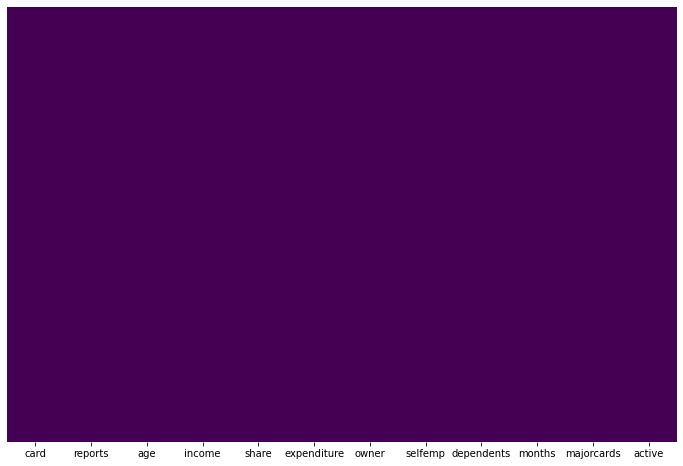

In [6]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(credit.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [7]:
# Describing all the data
credit.describe

<bound method NDFrame.describe of      card  reports       age  income     share  expenditure owner selfemp  \
0     yes        0  37.66667  4.5200  0.033270   124.983300   yes      no   
1     yes        0  33.25000  2.4200  0.005217     9.854167    no      no   
2     yes        0  33.66667  4.5000  0.004156    15.000000   yes      no   
3     yes        0  30.50000  2.5400  0.065214   137.869200    no      no   
4     yes        0  32.16667  9.7867  0.067051   546.503300   yes      no   
...   ...      ...       ...     ...       ...          ...   ...     ...   
1314  yes        0  33.58333  4.5660  0.002146     7.333333   yes      no   
1315   no        5  23.91667  3.1920  0.000376     0.000000    no      no   
1316  yes        0  40.58333  4.6000  0.026513   101.298300   yes      no   
1317  yes        0  32.83333  3.7000  0.008999    26.996670    no     yes   
1318  yes        0  48.25000  3.7000  0.111619   344.157500   yes      no   

      dependents  months  majorcards  act

In [8]:
# Describing dataset numeric credit.describe()
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
reports,1319.0,0.456406,1.345267,0.000000,0.000000,0.000000,0.000000,14.00000
age,1319.0,33.213103,10.142783,0.166667,25.416670,31.250000,39.416670,83.50000
income,1319.0,3.365376,1.693902,0.210000,2.243750,2.900000,4.000000,13.50000
share,1319.0,0.068732,0.094656,0.000109,0.002316,0.038827,0.093617,0.90632
expenditure,1319.0,185.057071,272.218917,0.000000,4.583333,101.298300,249.035800,3099.50500
dependents,1319.0,0.993935,1.247745,0.000000,0.000000,1.000000,2.000000,6.00000
months,1319.0,55.267627,66.271746,0.000000,12.000000,30.000000,72.000000,540.00000
majorcards,1319.0,0.817286,0.386579,0.000000,1.000000,1.000000,1.000000,1.00000
active,1319.0,6.996967,6.305812,0.000000,2.000000,6.000000,11.000000,46.00000


In [9]:
# Describing dataset object data.describe()
credit.describe(include='object').T

,count,unique,top,freq
card,1319,2,yes,1023
owner,1319,2,no,738
selfemp,1319,2,no,1228


In [10]:
# is there any duplicate 
credit.duplicated().sum()

0

In [11]:
#tabulate the target variable
credit['card'].value_counts()

yes    1023
no      296
Name: card, dtype: int64

In [12]:
# summary the target variable
rp.summary_cat(credit['card'])

,Variable,Outcome,Count,Percent
0,card,yes,1023,77.56
1,,no,296,22.44


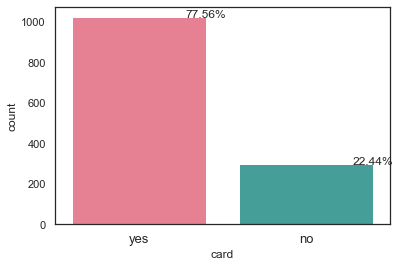

In [13]:
# Plot the target variable
sns.set(style="white")
ax=sns.countplot(x='card', data=credit, palette="husl")
plt.xticks(size=13)
total = float(len(credit))
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = False

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

Text(0.5, 0, 'Months')

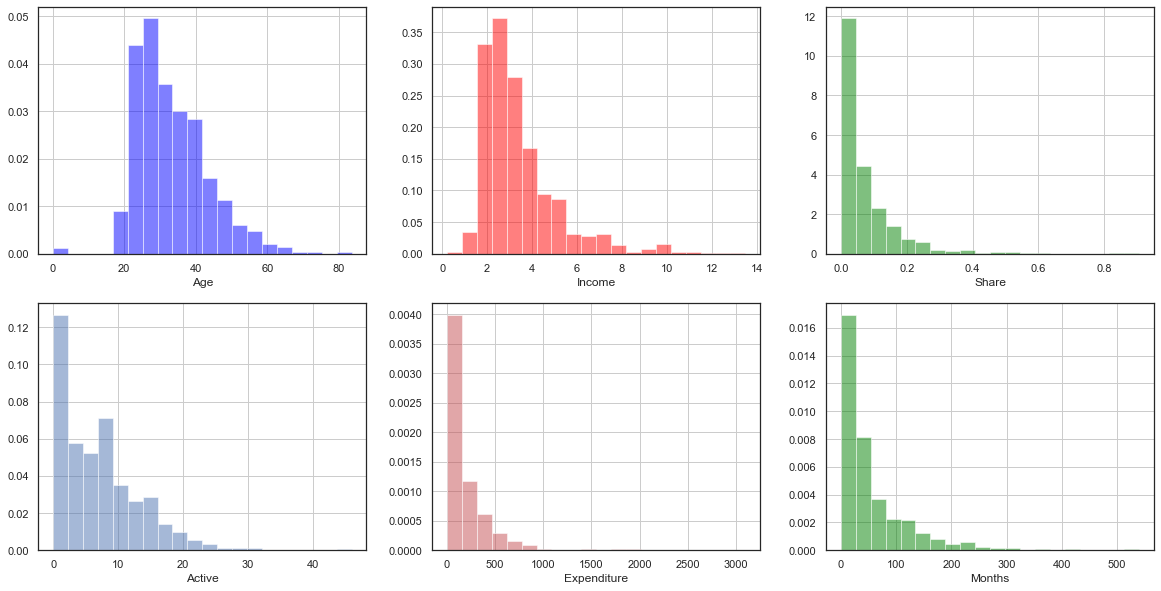

In [14]:
# histogram of some variables
fig = plt.figure(figsize=(20, 10))
sns.set(style="white")
plt.subplot(2, 3, 1)
credit['age'].hist(histtype="bar", bins=20, alpha=0.5, color="blue", density=1)
plt.xlabel("Age")

plt.subplot(2, 3, 2)
credit['income'].hist(histtype="bar", bins=20, alpha=0.5, color="red", density=1)
plt.xlabel("Income")

plt.subplot(2, 3, 3)
credit['share'].hist(histtype="bar", bins=20, alpha=0.5, color="green", density=1)
plt.xlabel("Share")

plt.subplot(2, 3, 4)
credit['active'].hist(histtype="bar", bins=20, alpha=0.5, color="b", density=1)
plt.xlabel("Active")

plt.subplot(2, 3, 5)
credit['expenditure'].hist(histtype="bar", bins=20, alpha=0.5, color="r", density=1)
plt.xlabel("Expenditure")

plt.subplot(2, 3, 6)
credit['months'].hist(histtype="bar", bins=20, alpha=0.5, color="green", density=1)
plt.xlabel("Months")

In [15]:
# Calculating the correlation
credit.corr()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
reports,1.000000,0.044089,0.011023,-0.159011,-0.136538,0.019731,0.048968,-0.007304,0.207755
age,0.044089,1.000000,0.324653,-0.115697,0.014948,0.212146,0.436426,0.009777,0.181070
income,0.011023,0.324653,1.000000,-0.054429,0.281104,0.317601,0.130346,0.107138,0.180540
share,-0.159011,-0.115697,-0.054429,1.000000,0.838779,-0.082618,-0.055348,0.051470,-0.023474
expenditure,-0.136538,0.014948,0.281104,0.838779,1.000000,0.052664,-0.029007,0.077514,0.054724
dependents,0.019731,0.212146,0.317601,-0.082618,0.052664,1.000000,0.046512,0.010285,0.107133
months,0.048968,0.436426,0.130346,-0.055348,-0.029007,0.046512,1.000000,-0.041447,0.100028
majorcards,-0.007304,0.009777,0.107138,0.051470,0.077514,0.010285,-0.041447,1.000000,0.119603
active,0.207755,0.181070,0.180540,-0.023474,0.054724,0.107133,0.100028,0.119603,1.000000


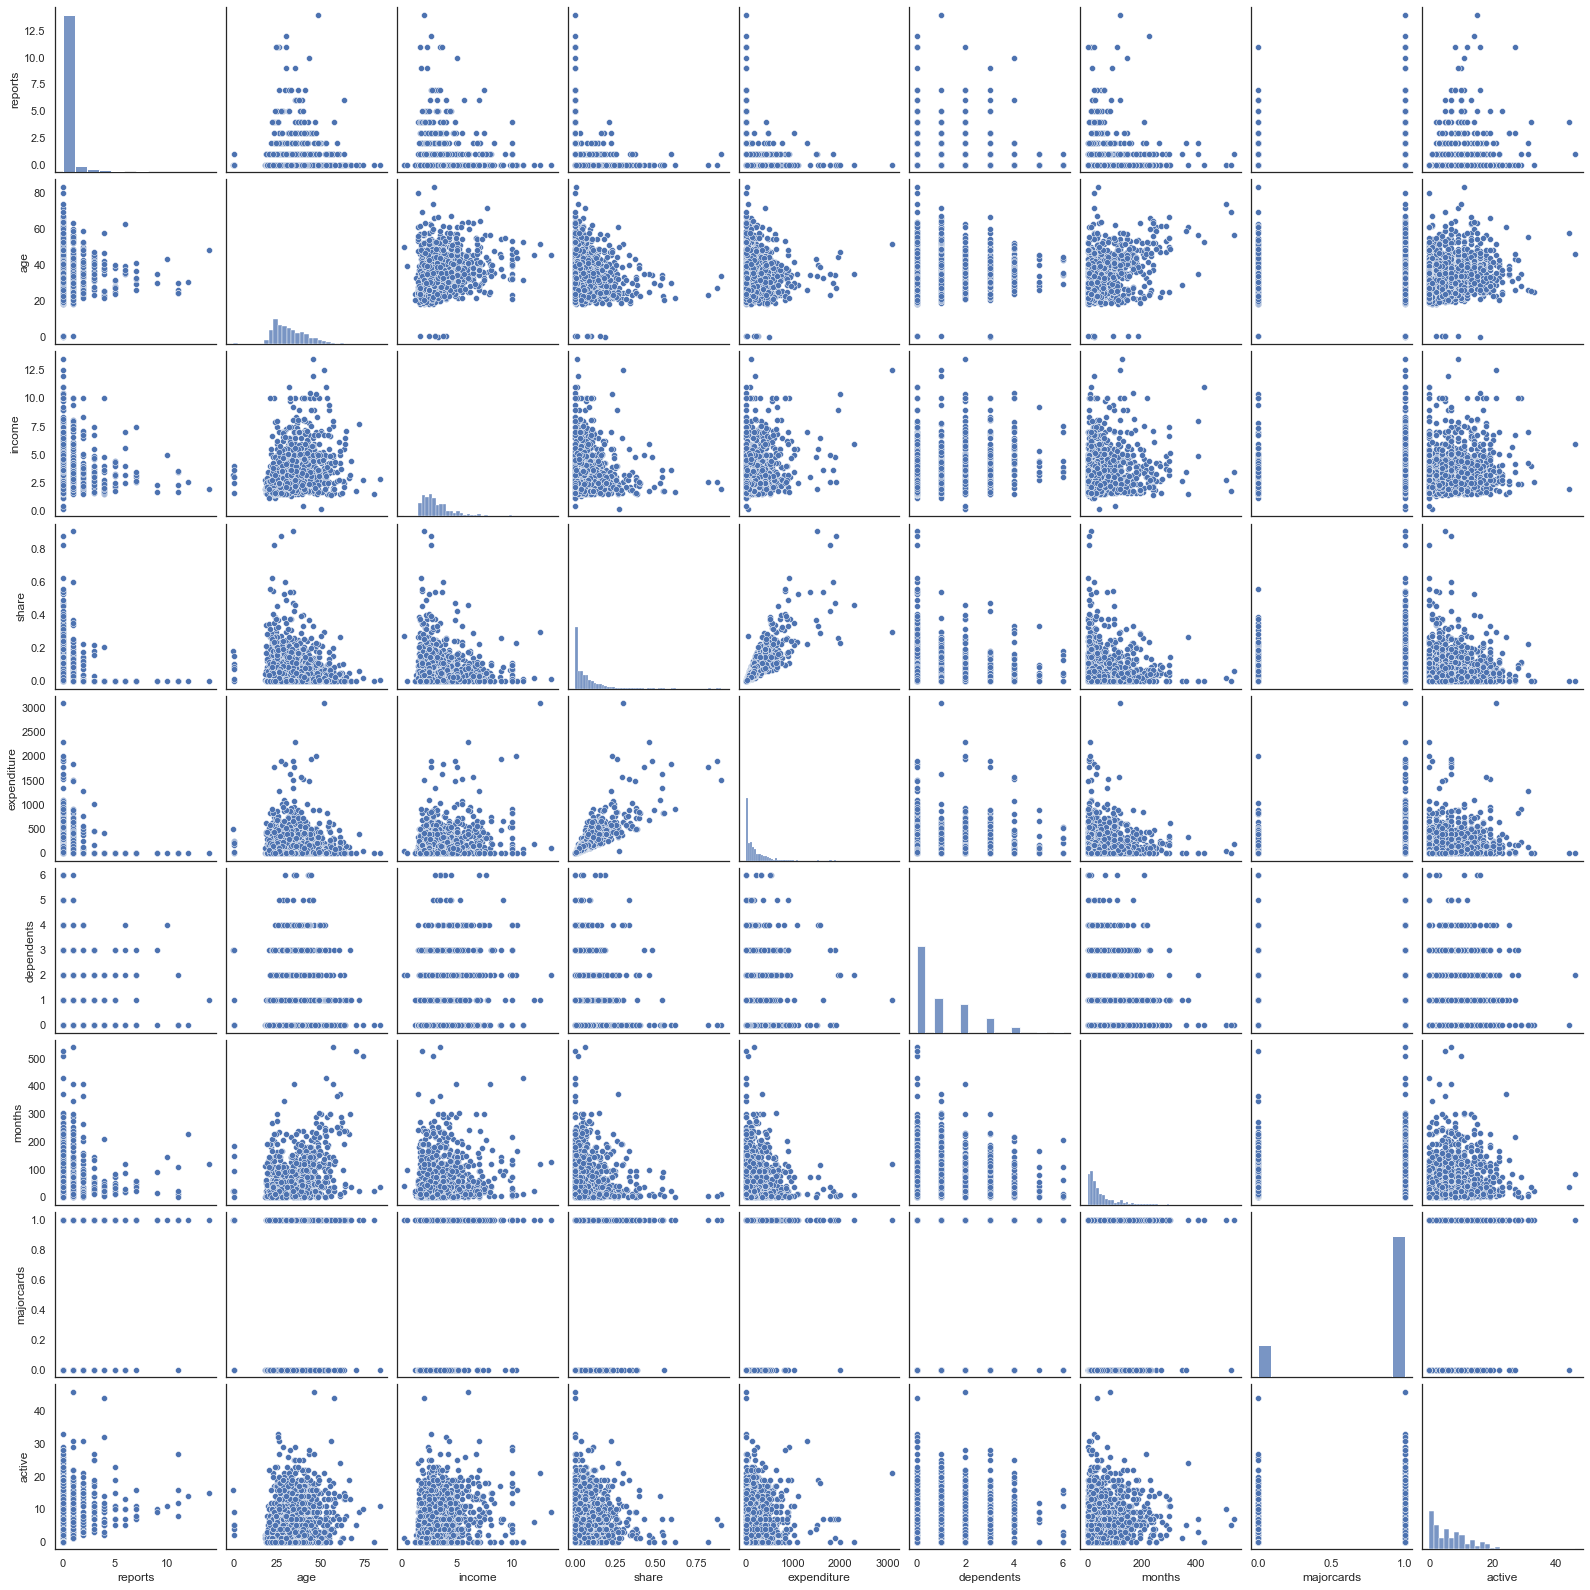

In [16]:
sns.pairplot(credit)

In [17]:
#divise the data into numeric and non-numeric
non_numeric=credit[['card', 'reports', 'owner','selfemp', 'dependents',  'majorcards']]
numeric=credit[['age', 'income', 'share', 'expenditure', 'months', 'active']]

In [18]:
# Calculating the correlation of numeric data
numeric.corr()

,age,income,share,expenditure,months,active
age,1.000000,0.324653,-0.115697,0.014948,0.436426,0.181070
income,0.324653,1.000000,-0.054429,0.281104,0.130346,0.180540
share,-0.115697,-0.054429,1.000000,0.838779,-0.055348,-0.023474
expenditure,0.014948,0.281104,0.838779,1.000000,-0.029007,0.054724
months,0.436426,0.130346,-0.055348,-0.029007,1.000000,0.100028
active,0.181070,0.180540,-0.023474,0.054724,0.100028,1.000000


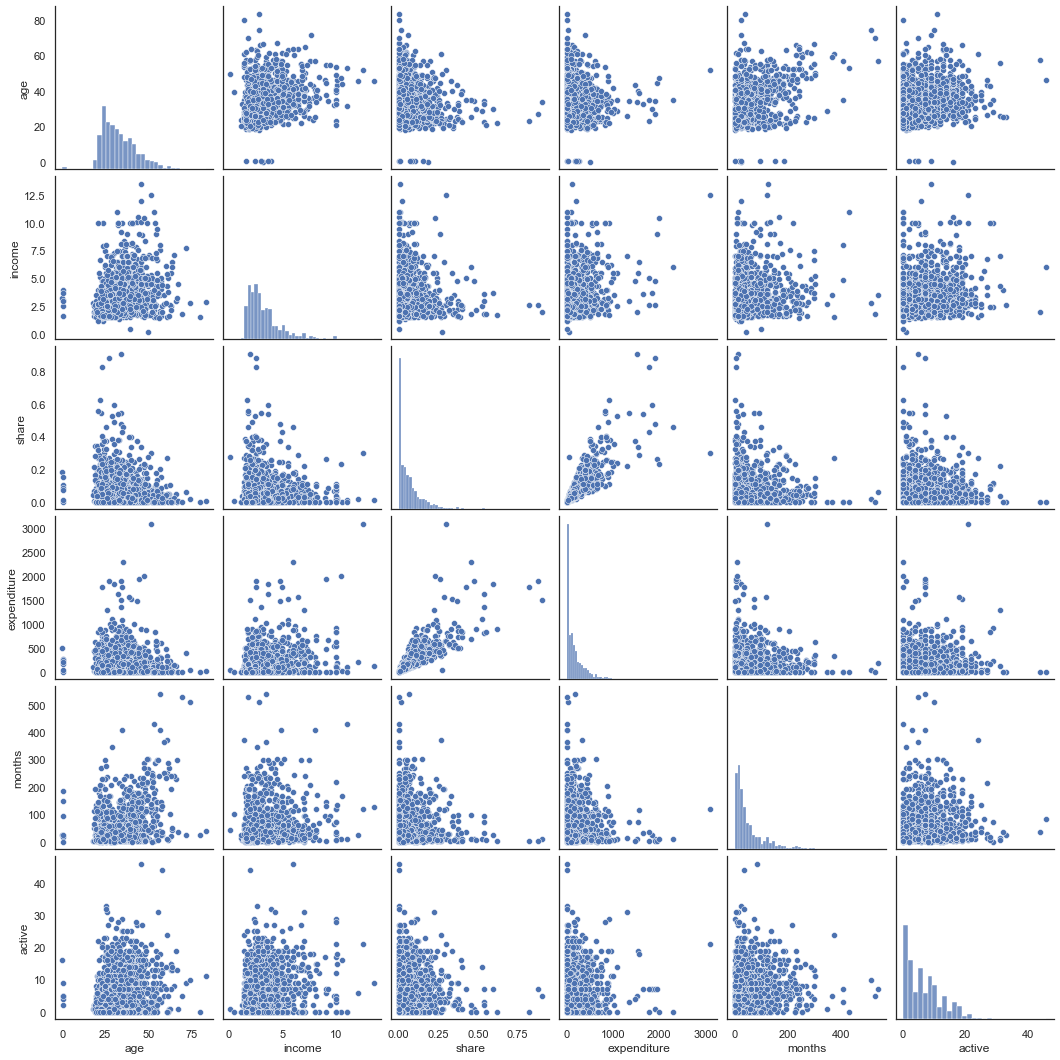

In [19]:
sns.pairplot(numeric)

In [20]:
rp.corr_pair(numeric)

,r value,p-value,N
age & income,0.3247,0.0000,1319
age & share,-0.1157,0.0000,1319
age & expenditure,0.0149,0.5876,1319
age & months,0.4364,0.0000,1319
age & active,0.1811,0.0000,1319
income & share,-0.0544,0.0481,1319
income & expenditure,0.2811,0.0000,1319
income & months,0.1303,0.0000,1319
income & active,0.1805,0.0000,1319
share & expenditure,0.8388,0.0000,1319


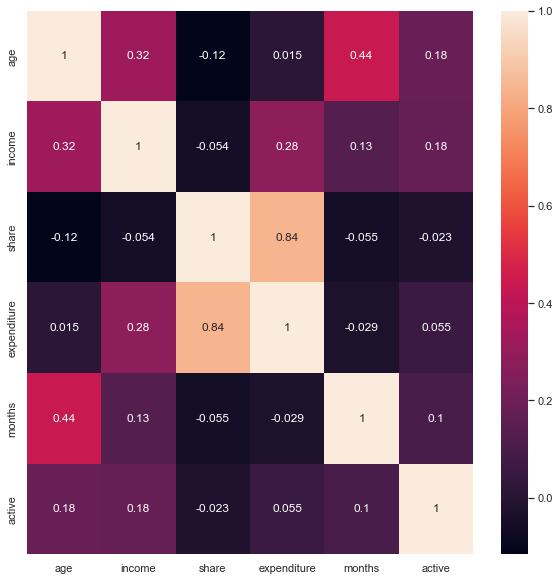

In [21]:
#heat map representing corelations between each feature
plt.figure(figsize=(10,10))

sns.heatmap(numeric.corr(),annot=True)
plt.show()

In [22]:
non_numeric

,card,reports,owner,selfemp,dependents,majorcards
0,yes,0,yes,no,3,1
1,yes,0,no,no,3,1
2,yes,0,yes,no,4,1
3,yes,0,no,no,0,1
4,yes,0,yes,no,2,1
...,...,...,...,...,...,...
1314,yes,0,yes,no,0,1
1315,no,5,no,no,3,1
1316,yes,0,yes,no,2,1
1317,yes,0,no,yes,0,1


In [23]:
# Label transformation
obj= ['card','owner', 'selfemp']

for a in obj:
    Label_Encoder = LabelEncoder()
    n = str(a) + "_n"
    non_numeric[n] = Label_Encoder.fit_transform(non_numeric[a])
    

C:\Users\moham\AppData\Local\Temp/ipykernel_6140/644840573.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_numeric[n] = Label_Encoder.fit_transform(non_numeric[a])


In [24]:
#make copy to the data
non_numeric1= non_numeric.copy(deep=True)

#drop the objects variable from credit1
for a in obj:
        del non_numeric1[a]
non_numeric1.head()

,reports,dependents,majorcards,card_n,owner_n,selfemp_n
0,0,3,1,1,1,0
1,0,3,1,1,0,0
2,0,4,1,1,1,0
3,0,0,1,1,0,0
4,0,2,1,1,1,0


In [25]:
#concatenate the numeric and non numeric data
credit1= pd.concat([non_numeric1, numeric], axis = 1)
credit1.head()

,reports,dependents,majorcards,card_n,owner_n,selfemp_n,age,income,share,expenditure,months,active
0,0,3,1,1,1,0,37.66667,4.5200,0.033270,124.983300,54,12
1,0,3,1,1,0,0,33.25000,2.4200,0.005217,9.854167,34,13
2,0,4,1,1,1,0,33.66667,4.5000,0.004156,15.000000,58,5
3,0,0,1,1,0,0,30.50000,2.5400,0.065214,137.869200,25,7
4,0,2,1,1,1,0,32.16667,9.7867,0.067051,546.503300,64,5


# Analyzing Credit Card Dataset

In [26]:
# perform the  X, y
X= credit1.drop('card_n', axis=1)
y= credit1['card_n']

In [27]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.3, random_state=1711)

In [28]:
# Scaling the numeric data
sc=StandardScaler()
X_train = sc.fit_transform(X_train[['age', 'income', 'share', 'expenditure', 'months', 'active']])
X_test = sc.transform(X_test[['age', 'income', 'share', 'expenditure', 'months', 'active']])

## Running Logistic Regression

In [29]:
Logistic_Model = LogisticRegression().fit(X_train, y_train)
#prediction using Logistic model
y_pre_Logistic= Logistic_Model.predict(X_test)

<AxesSubplot:>

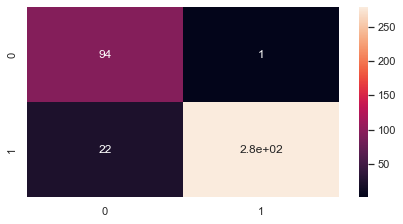

In [30]:
cm_Logistic= confusion_matrix(y_test, y_pre_Logistic)
sns.heatmap(cm_Logistic, annot=True)

In [31]:
print(confusion_matrix(y_test, y_pre_Logistic))

[[ 94   1]
 [ 22 279]]


In [32]:
print(classification_report(y_test, y_pre_Logistic))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89        95
           1       1.00      0.93      0.96       301

    accuracy                           0.94       396
   macro avg       0.90      0.96      0.93       396
weighted avg       0.95      0.94      0.94       396



In [33]:
# The Logistic model AUC score
# -------------------------
y_pred_logic_prob = Logistic_Model.predict_proba(X_test)
fpr_logic, tpr_logic, thresholds = roc_curve(y_test, y_pred_logic_prob[:,1])
auc_logic = auc(fpr_logic, tpr_logic)

print ('The Logistic AUC Score is: {:.4f}'.format(auc_logic))
print("*"*40)


The Logistic AUC Score is: 0.9843
****************************************


# Classification Decision Tree Hyperparameter

In [34]:
## =======================================================
#           Tune the decision Tree hyperparameters
## =======================================================

# Define param_grid
decision_tree = DecisionTreeClassifier(random_state=1711) 
                               
params_decision_tree = {
    'max_depth': [2, 3, 4, 6, 8, 10],
    'min_samples_leaf':[0.08,0.1, .12, 0.14, .16, .18],
    }

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator = decision_tree, 
                       param_grid= params_decision_tree,
                       scoring='roc_auc',
                       cv= 10,
                       n_jobs= -1)

In [35]:
# Fit the GridSearchCV object
grid_dt.fit(X_train, y_train)


# Extract best hyperparameters from 'grid_dt' and print them
best_hyperparams = grid_dt.best_params_

print('Best hyerparameters:\n'.center(40))
print("="*50)
print(best_hyperparams)
print("*"*50)

# Extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_

print('Best CV accuracy {}'.format(best_CV_score))


# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_

print("*"*50)
print("The best estimator is:")
print("-"*len("The best estimator is:"))
print(best_model)
print("*"*50)

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]
best_model.predict_proba
# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))
print("="*50)


         Best hyerparameters:
          
{'max_depth': 2, 'min_samples_leaf': 0.1}
**************************************************
Best CV accuracy 0.9901824672030152
**************************************************
The best estimator is:
----------------------
DecisionTreeClassifier(max_depth=2, min_samples_leaf=0.1, random_state=1711)
**************************************************
Test set ROC AUC score: 0.985


In [36]:
#fit the model
Decision_Tree = DecisionTreeClassifier(max_depth=2,
                                       min_samples_leaf=0.1,
                                       random_state=1711) 
Decision_Tree.fit(X_train, y_train)
#predict the model
y_pred_dt=Decision_Tree.predict(X_test)

In [37]:
# Predict the test set probabilities of the positive class
y_pred_proba =Decision_Tree.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))
print("="*50)
# accuracy 
score= accuracy_score(y_test, y_pred_dt)
print('score: {:.3f}'.format(score))
print("="*50)
print(classification_report(y_test, y_pred_dt))

Test set ROC AUC score: 0.985
score: 0.982
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        95
           1       1.00      0.98      0.99       301

    accuracy                           0.98       396
   macro avg       0.97      0.99      0.98       396
weighted avg       0.98      0.98      0.98       396



In [38]:
# The Decision Tree model AUC score
# -------------------------
y_pred_dt_prob = Decision_Tree.predict_proba(X_test)
fpr_dtree, tpr_dtree, thresholds = roc_curve(y_test, y_pred_dt_prob[:,1])
auc_tree = auc(fpr_dtree, tpr_dtree)

print ('The Decision Tree AUC Score is: {:.4f}'.format(auc_tree))
print("*"*40)


The Decision Tree AUC Score is: 0.9853
****************************************


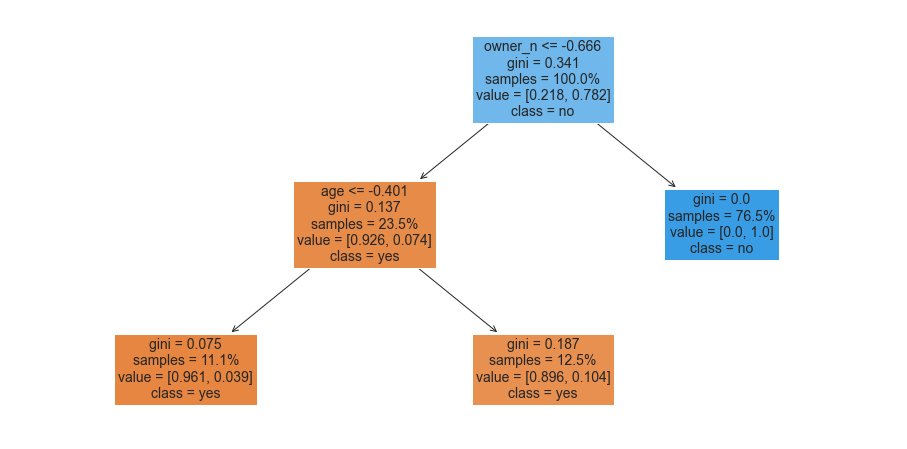

In [39]:
# You can assign the plotting results to the dummy variable `_` (underscore)
# if you don't want to save the results
# --------------------------------------------------------------------------
features = list(credit1.columns[1:])

plt.figure(figsize=(16, 8))
_ = plot_tree(Decision_Tree, filled=True,
                   feature_names = features,
                   fontsize=14, 
                   proportion=True,
                   class_names=['yes','no'])



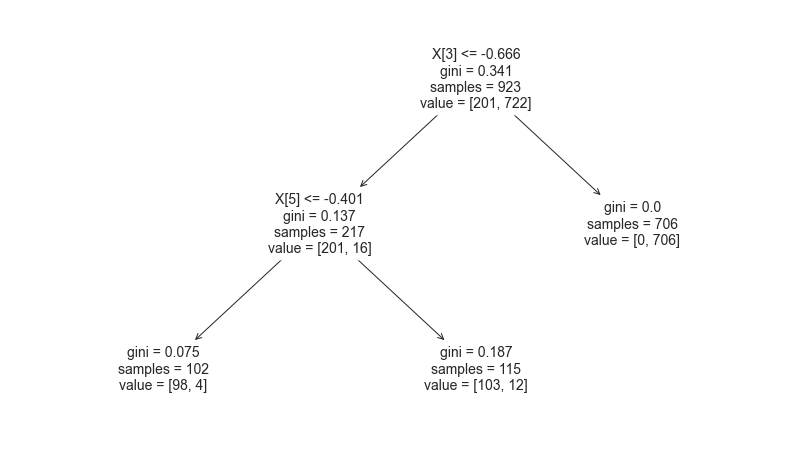

In [40]:
## Plot the tree and display the text
# ----------------------------------

plt.figure(figsize=(14, 8))

text_split_info = plot_tree(Decision_Tree, rounded=True, fontsize=14)

# KNeighborsClassifier KNN`

In [41]:
# Create empty list for storing the accuracy on both train and test sets

training_accuracy = [] 
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_space = range(1, 10)

# Loop over the k neighobors_space (1, 10)
for n_neighbors in neighbors_space:
    
# build the KNN classifier model
    clss = KNeighborsClassifier(n_neighbors = n_neighbors)
    clss.fit(X_train, y_train) 
    
    # Record the training set accuracy
    training_accuracy.append(clss.score(X_train, y_train)) 
    
    # record generalization accuracy 
    test_accuracy.append(clss.score(X_test, y_test))

In [42]:
ideal_test=np.argmax(test_accuracy)
ideal_test

7

In [43]:
# Create and fit a knn classifier Object with k=7
KNN_MODEL= KNeighborsClassifier(n_neighbors=7).fit(X_train,y_train)

#prediction using KNN model 
y_pred_knn=KNN_MODEL.predict(X_test)

<AxesSubplot:>

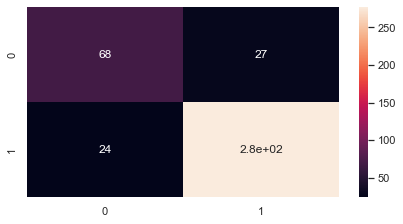

In [44]:
#confusion Matrix
cm_knn=confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cm_knn, annot=True)

In [45]:
print(confusion_matrix(y_test,y_pred_knn))

[[ 68  27]
 [ 24 277]]


In [46]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73        95
           1       0.91      0.92      0.92       301

    accuracy                           0.87       396
   macro avg       0.83      0.82      0.82       396
weighted avg       0.87      0.87      0.87       396



In [47]:
# Score the knn classifier 
acc_knn = KNN_MODEL.score(X_test, y_test)

# Print the accuracy
print("The model Accuracy is".center(70))
print("="*70)
print("Test set accuracy: {:.2f}".format(acc_knn))
print("-"*70)

                        The model Accuracy is                         
Test set accuracy: 0.87
----------------------------------------------------------------------


In [48]:
# The Knn Model model AUC score
# -------------------------
y_pred_knn_prob = KNN_MODEL.predict_proba(X_test)
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_pred_knn_prob[:,1])
auc_knn = auc(fpr_knn, tpr_knn)

print ('The KNN AUC Score is: {:.4f}'.format(auc_knn))
print("*"*40)


The KNN AUC Score is: 0.9384
****************************************


# Voting Classifier

In [49]:
# logistic regression (Logistic_Model)

#  knn (KNN_MODEL)

# Instantiate Decision Tree (Decision_Tree)

# Define the list classifiers
classifiers = [('Logistic Regression', Logistic_Model), 
               ('K Nearest Neighbours', KNN_MODEL), 
               ('Classification Tree', Decision_Tree)]

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_pred, y_test) 
   
    # Evaluate clf's accuracy on the test set
    print('{:20}: {:.3f}'.format(clf_name,  accuracy))

Logistic Regression : 0.942
K Nearest Neighbours: 0.871
Classification Tree : 0.982


In [50]:
# Instantiate a VotingClassifier vc
Voting_Classifier = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
Voting_Classifier.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred_voting = Voting_Classifier.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_pred_voting, y_test)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.957


# Bagging

In [51]:

# Instantiate Decision Tree (Decision_Tree)


# Instantiate bg
# ==============
Bagging_Classifier = BaggingClassifier(base_estimator=Decision_Tree,
                       n_estimators= 300,
                       oob_score=True,                
                       random_state=1711)


# Fit bc to the training set
# =========================
Bagging_Classifier.fit(X_train, y_train)

# Predict test set labels
# -----------------------
y_pred = Bagging_Classifier.predict(X_test)

# Evaluate OOB accuracy
# ---------------------
oob_acc = Bagging_Classifier.oob_score_

# Evaluate test set accuracy
# --------------------------
test_acc = accuracy_score(y_pred, y_test)

# Print acc_test and acc_oob
# --------------------------
print("*"*50)
print('Test set accuracy: {:.3f}'.format(test_acc))
print("*"*50)
print('The OOB accuracy: {:.3f}'.format(oob_acc))

**************************************************
Test set accuracy: 0.982
**************************************************
The OOB accuracy: 0.982


In [52]:
# logistic regression (Logistic_Model)

# Instantiate bc
# ==============
Bagging_Classifier_Logistic = BaggingClassifier(base_estimator=Logistic_Model,
                       n_estimators= 300,
                       oob_score=True,
                       random_state=1711)


# Fit bc to the training set
# =========================
Bagging_Classifier_Logistic.fit(X_train, y_train)

# Predict test set labels
# -----------------------
y_pred = Bagging_Classifier_Logistic.predict(X_test)

# Evaluate test set accuracy
# --------------------------
test_acc = accuracy_score(y_pred, y_test)

# Evaluate OOB accuracy
# ---------------------
oob_acc =  Bagging_Classifier_Logistic.oob_score_

# Print acc_test and acc_oob
# --------------------------
print("*"*50)
print('Test set accuracy: {:.3f}'.format(test_acc))
print("*"*50)
print('The OOB accuracy: {:.3f}'.format(oob_acc))

**************************************************
Test set accuracy: 0.939
**************************************************
The OOB accuracy: 0.935


In [53]:

#  knn (KNN_MODEL)

# Instantiate bc
# ==============
Bagging_Classifier_knn = BaggingClassifier(base_estimator=KNN_MODEL,
                       n_estimators= 300,
                       oob_score=True,                    
                       random_state=1711)


# Fit bc to the training set
# =========================
Bagging_Classifier_knn.fit(X_train, y_train)

# Predict test set labels
# -----------------------
y_pred = Bagging_Classifier_knn.predict(X_test)

# Evaluate test set accuracy
# --------------------------
test_acc = accuracy_score(y_pred, y_test)

# Evaluate OOB accuracy
# ---------------------
oob_acc = Bagging_Classifier_knn.oob_score_

# Print acc_test and acc_oob
# --------------------------
print("*"*50)
print('Test set accuracy: {:.3f}'.format(test_acc))
print("*"*50)
print('The OOB accuracy: {:.3f}'.format(oob_acc))

**************************************************
Test set accuracy: 0.866
**************************************************
The OOB accuracy: 0.832


# Random Forest

In [54]:
# Instantiate a random forests classifier 'RandomForest_Classifier'
RandomForest_Classifier = RandomForestClassifier(random_state= 1711)

# Define a grid of hyperparameter 'params_rf_reg' (the same for classifier)
params_rf_clf = {
              'n_estimators': [100, 200, 300, 400, 500],
              'max_depth': [2, 4, 6, 8],
              'min_samples_leaf': [0.1, 0.2, 0.3, 0.4, 0.5],
              'max_features': ['log2', 'sqrt']
}


# Instantiate 'grid_rf_clf'
grid_rf_clf = GridSearchCV(estimator=RandomForest_Classifier,
                       param_grid=params_rf_clf,
                       cv=5,
                       scoring='neg_mean_squared_error',
                       verbose=1,
                       n_jobs=-1)


 # Fit 'grid_rf_clf' to the training set
grid_rf_clf.fit(X_train, y_train)

 # Extract the best hyperparameters from 'grid_rf'
best_hyperparams = grid_rf_clf.best_params_
print('Best hyperparameters:\n', best_hyperparams)

 # Extract the best model from 'grid_rf'
best_model = grid_rf_clf.best_estimator_

# Predict the test set labels
y_pred = best_model.predict(X_test)

# Evaluate test set accurac
test_acc = accuracy_score(y_pred, y_test)

# Print the test set RMSE
print('The Accuracy is : {:.2f}'.format(test_acc))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best hyperparameters:
 {'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 100}
The Accuracy is : 0.98


<AxesSubplot:>

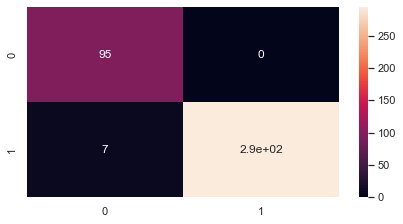

In [55]:
cm_RandomForest = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_RandomForest, annot=True)

In [56]:
print(confusion_matrix(y_test, y_pred))

[[ 95   0]
 [  7 294]]


In [57]:
# Predict the test set probabilities of the positive class
y_pred_proba =best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

print("="*50)
# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))
print("="*50)

Test set ROC AUC score: 0.986


In [58]:
# Instantiate a random forests classifier 'RandomForest_Classifier'
RandomForest_Classifier1 = RandomForestClassifier(random_state= 1711)

# Define a grid of hyperparameter 'params_rf_reg' (the same for classifier)
params_rf_clf1 = {
              'n_estimators': [100],
              'max_depth': [2],
              'min_samples_leaf': [0.1],
              'max_features': ['log2']
}


grid_rf_clf1 = GridSearchCV(estimator=RandomForest_Classifier1,
                       param_grid=params_rf_clf1,
                       cv=5,
                       scoring='neg_mean_squared_error',
                       verbose=1,
                       n_jobs=-1)


 # Fit 'grid_rf_clf' to the training set
grid_rf_clf1.fit(X_train, y_train)

# Predict the test set labels
y_pred_random = grid_rf_clf1.predict(X_test)

# Evaluate test set accurac
test_acc = accuracy_score(y_pred_random, y_test)

# Print the test set RMSE
print('The Accuracy is : {:.2f}'.format(test_acc))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
The Accuracy is : 0.98


In [59]:
# Predict the test set probabilities of the positive class
y_pred_proba1 =grid_rf_clf1.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba1)

print("="*50)
# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))
print("="*50)

Test set ROC AUC score: 0.986


# AdaBoost Classifier

In [60]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


## ========================================================
#.     Adaboost hyperparameter tuning with decision tree as
#.     a base learner using GridSeachCV Algorithm
## ========================================================

# Create the estimator with dtree
# -------------------------------
ada_tree = AdaBoostClassifier(
    base_estimator = Decision_Tree,             
                        random_state=1711)

ada_param_grid = {'n_estimators': [10, 100],
                 'learning_rate': [0.01, 1]}

ada_gs = GridSearchCV(estimator=ada_tree ,
                       param_grid=ada_param_grid,
                       #cv = 10,
                       verbose = 1)

# Fitting the grid
# ---------------
ada_gs_model = ada_gs.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [61]:
print("*"*40)

for hyper_name, val in ada_gs_model.best_params_.items():
    print("{:15s} : {}".format(hyper_name, val))
print("*"*40)
print("The best score: {:.4f}".format(ada_gs_model.best_score_))
print("*"*40)

****************************************
learning_rate   : 0.01
n_estimators    : 10
****************************************
The best score: 0.9816
****************************************


In [62]:
## =======================================================
#      Fitting the tuned adaboost
## =======================================================

# Tuning the hyperparams
ada_tuned = AdaBoostClassifier(
           base_estimator=Decision_Tree,                          
           n_estimators=10,                                                                              
           learning_rate=0.01,                                   
           random_state=1711)

ada_tuned.fit(X_train, y_train)

# The accuracy of tuned model
# ---------------------------
print("*"*40)
print('The Tuned model accuracy is: {:.4}'.format(
    (ada_tuned.score(X_test,y_test)))
     )
print("*"*40)

# The Tuned model AUC score
# -------------------------
y_pred_ada_tuned = ada_tuned.predict_proba(X_test)
fpr_ab_tuned, tpr_ab_tuned, thresholds = roc_curve(y_test, y_pred_ada_tuned[:,1])
auc_adaboost_tune = auc(fpr_ab_tuned, tpr_ab_tuned)

print ('The Tuned Adaboost AUC Score is: {:.4f}'.format(auc_adaboost_tune))
print("*"*40)

****************************************
The Tuned model accuracy is: 0.9823
****************************************
The Tuned Adaboost AUC Score is: 0.9853
****************************************


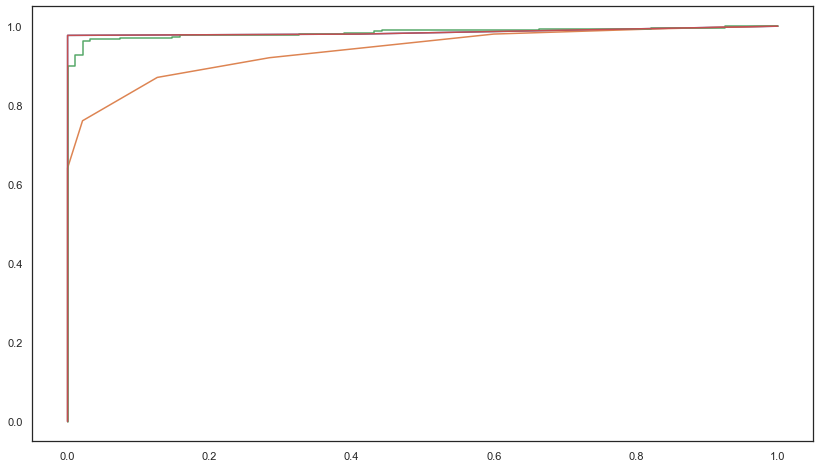

In [63]:
plt.figure(figsize=(14,8))

plt.plot(fpr_dtree, tpr_dtree,label="Model1: Decison Tree, auc="+str(auc_tree))
plt.plot(fpr_knn, tpr_knn,label="Model2: KNN, auc="+str(auc_knn))
plt.plot(fpr_logic, tpr_logic,label="Model3: Logistic, auc="+str(auc_logic))
plt.plot(fpr_ab_tuned,tpr_ab_tuned,
         label="Model4: Adaboost with Tuning, auc="+
         str(auc_adaboost_tune))


plt.show()

# Gradient Boosting 

In [66]:
## =========================================================
#.      Gradient Boosting Classifier Hyperparameter Tuning 
#.      using GridSearch CV
## =========================================================

# Create a dictionary of the grid
# -----------------------------
params_grid_gradient = {
    "n_estimators":[100,150,200],
    "learning_rate": [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
    "max_depth":[2, 3, 5,7, 8],
    "max_features":["log2","sqrt"],
    }

# Instantiate the grid search CV
# ------------------------------
grid_gradient = GridSearchCV(
            estimator=GradientBoostingClassifier(random_state=1711),
            param_grid= params_grid_gradient,
            cv=5, 
            n_jobs=-1,
            verbose = 1)
# fitting the grid gradient:
grid_gradient.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1711),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9,
                                           1],
                         'max_depth': [2, 3, 5, 7, 8],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [100, 150, 200]},
             verbose=1)

In [72]:
#get best parameters: 
print('*'*40)
for name, val in grid_gradient.best_params_.items():
    print('{0:20} : {1}'.format(name, val))

# the best score
print('='*40)
print('The best score is: {:.4f}'.format(grid_gradient.best_score_))
print('='*40)   

****************************************
learning_rate        : 0.1
max_depth            : 8
max_features         : log2
n_estimators         : 200
The best score is: 0.9827


In [73]:
Gradient_Model=GradientBoostingClassifier(random_state=1711,
                                         learning_rate=0.1,
                                         max_depth=8,
                                         max_features='log2',
                                         n_estimators=200)
Gradient_Model.fit(X_train, y_train)
y_pred_Gradient=Gradient_Model.predict(X_test)
print("The Gradient Boosting Classification report".center(60))
print("="*60)
print(classification_report(y_test, y_pred_Gradient))
print("="*60)

        The Gradient Boosting Classification report         
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        95
           1       0.99      0.98      0.98       301

    accuracy                           0.97       396
   macro avg       0.96      0.97      0.96       396
weighted avg       0.97      0.97      0.97       396



In [75]:
#Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_Gradient))

Confusion Matrix:
[[ 91   4]
 [  7 294]]


<AxesSubplot:>

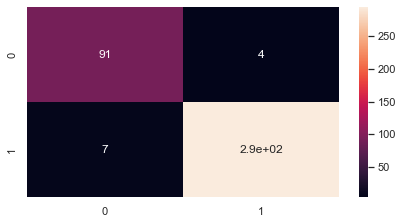

In [77]:
cm_Gradient=confusion_matrix(y_test, y_pred_Gradient)
sns.heatmap(cm_Gradient, annot=True)

In [78]:
# The  AUC score of Gradient
# -------------------------
y_pred_Gradient_prob = Gradient_Model.predict_proba(X_test) 
fpr_Gradient, tpr_Gradient, thresholds = roc_curve(y_test, y_pred_Gradient_prob[:,1])
auc_Gradient = auc(fpr_Gradient, tpr_Gradient)

print ('The Tuned Adaboost AUC Score is: {:.4f}'.format(auc_Gradient))
print("*"*40)

The Tuned Adaboost AUC Score is: 0.9890
****************************************
